# Homework 3: Differentiation
Name: Aurelia Brook

## 1. Taking derivatives of noisy data
In some cases one might want to take derivatives of noisy data but allow for discontinuities in the derivative. One way to do this is using a *total variation regularization*, such as that described by Knowles and Renka in section 3.6 of their *METHODS FOR NUMERICAL DIFFERENTIATION OF NOISY DATA* paper.

The paper can be found here:
https://ejde.math.txstate.edu/conf-proc/21/k3/knowles.pdf
and it will also be posted on the course website. 

### Question:
1. Implement the algorithm discribed in section 3.6
2. Test how well it works on the data (datax,datay) generated by running the fnoise function below on the vector xdata.
3. Explore different values of the regularization parameter $\alpha$.  

#### Given Function: ####

In [1]:
import numpy as np
from scipy import linalg

def fnoise(x):
    y=np.exp(-np.abs(x))*(0.9+0.2*np.random.rand(np.size(x)))+0.1*np.random.rand(np.size(x))-0.05
    return y

datax=np.linspace(-5,5,100)
datay=fnoise(datax)

#### Answers: ####

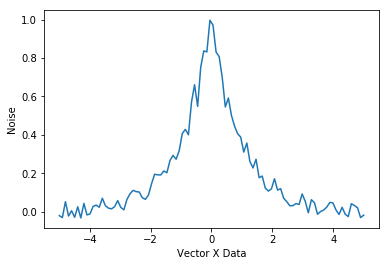

In [43]:
import matplotlib.pyplot as plt

plt.plot(datax, datay)
plt.xlabel("Vector X Data")
plt.ylabel("Noise")
plt.show()

In [44]:
def TVR(x, y, alpha, beta, it):
    a = x[0]
    g_a = y[0]
    x = np.array(x[1:])
    y = np.array(y[1:])
    n = len(x)
    u = yh = y - g_a
    delt = (x[-1] - a) / n
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i][j] = min(x[i], a + (j + 1) * delt + delt / 2) - max(a, a + j * delt + delt / 2)
    
    def delE(A, u, yh, alpha, s):
        return np.matmul(np.transpose(A), np.matmul(A, u) - yh) - alpha * s
        
    def Au(A, alpha, delt, u):
        U = np.zeros((len(u), len(u)))
        
        U[0][0] = 1 / abs(u[1]-u[0])
        U[0][1] = - 1 / abs(u[1]-u[0])
        for i in range(1, len(u)-1):
            U[i][i-1] = -1 / abs(u[i]-u[i-1])
            U[i][i] = 1 / abs(u[i+1]-u[i]) + 1 / abs(u[i]-u[i-1])
            U[i][i+1] = -1 / abs(u[i+1]-u[i])
        U[-1][-2] = -1 / abs(u[-1]-u[-2])
        U[-1][-1] = 1 / abs(u[-1]-u[-2])
        
        return np.matmul(np.transpose(A), A) + alpha*delt*U
    
    k=1
    while k < it:
        s = [np.sign(u[1] - u[0])]
        for i in range(1, n-1):
            s.append(np.sign(u[i+1] - u[i]) - np.sign(u[i] - u[i-1]))
        s.append(- np.sign(u[-1] - u[-2]))
        s = np.array(s)
        u = u - beta * np.matmul(np.linalg.inv(Au(A, alpha, delt, u)), delE(A, u, yh, alpha, s))
        
        
        k+=1
    f = [g_a]
    for j in range(1, n+1):
        f.append(delt * np.sum(u[:j])+g_a)
    return f
        

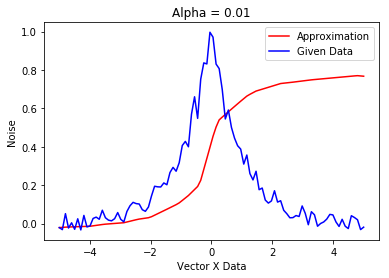

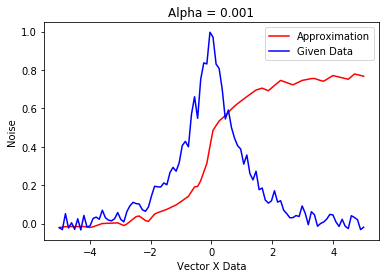

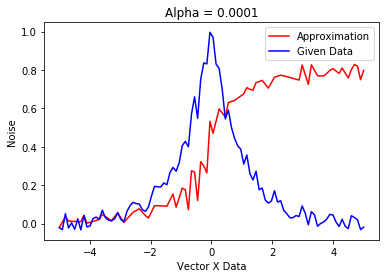

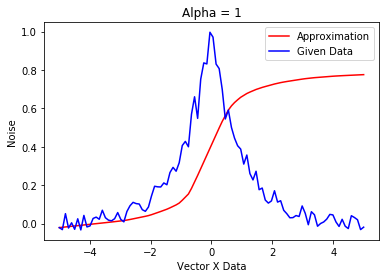

In [54]:
plt.figure(1)
approx=TVR(datax, datay, .01, .001, 1000)
plt.plot(datax, approx, 'r', label = "Approximation")
plt.plot(datax, datay, 'b', label = "Given Data")
plt.xlabel("Vector X Data")
plt.ylabel("Noise")
plt.title("Alpha = 0.01")
plt.legend()


plt.figure(2)
approx=TVR(datax, datay, .001, .001, 1000)
plt.plot(datax, approx, 'r', label = "Approximation")
plt.plot(datax, datay, 'b', label = "Given Data")
plt.xlabel("Vector X Data")
plt.ylabel("Noise")
plt.title("Alpha = 0.001")
plt.legend()

plt.figure(3)
approx=TVR(datax, datay, .0001, .001, 1000)
plt.plot(datax, approx, 'r', label = "Approximation")
plt.plot(datax, datay, 'b', label = "Given Data")
plt.xlabel("Vector X Data")
plt.ylabel("Noise")
plt.title("Alpha = 0.0001")
plt.legend()

plt.figure(4)
approx=TVR(datax, datay, 1, .001, 1000)
plt.plot(datax, approx, 'r', label = "Approximation")
plt.plot(datax, datay, 'b', label = "Given Data")
plt.xlabel("Vector X Data")
plt.ylabel("Noise")
plt.title("Alpha = 1")
plt.legend()

plt.show()